In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [42]:
data=pd.read_csv("cybersecurity_intrusion_data.csv")
data.head(5)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [44]:
data=data.drop(["session_id","encryption_used"],axis=1)

In [45]:
data.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [46]:
data.isnull().sum()

,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0
attack_detected,0


In [47]:
data.duplicated().sum()

np.int64(0)

#Osnovna eksplorativna analiza

/tmp/ipython-input-3184178789.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x="attack_detected",data=data,palette="Blues")


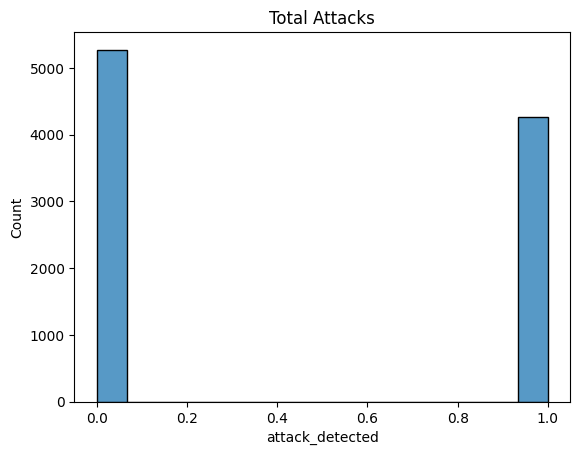

In [48]:
sns.histplot(x="attack_detected",data=data,palette="Blues")
plt.title("Total Attacks")
plt.show()

In [49]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

protocol_encoded = encoder.fit_transform(data[['protocol_type']])
protocol_df = pd.DataFrame(protocol_encoded, columns=encoder.get_feature_names_out(['protocol_type']), index=data.index)

browser_encoded = encoder.fit_transform(data[['browser_type']])
browser_df = pd.DataFrame(browser_encoded, columns=encoder.get_feature_names_out(['browser_type']), index=data.index)

data = pd.concat([data.drop(['protocol_type', 'browser_type'], axis=1), protocol_df, browser_df], axis=1)

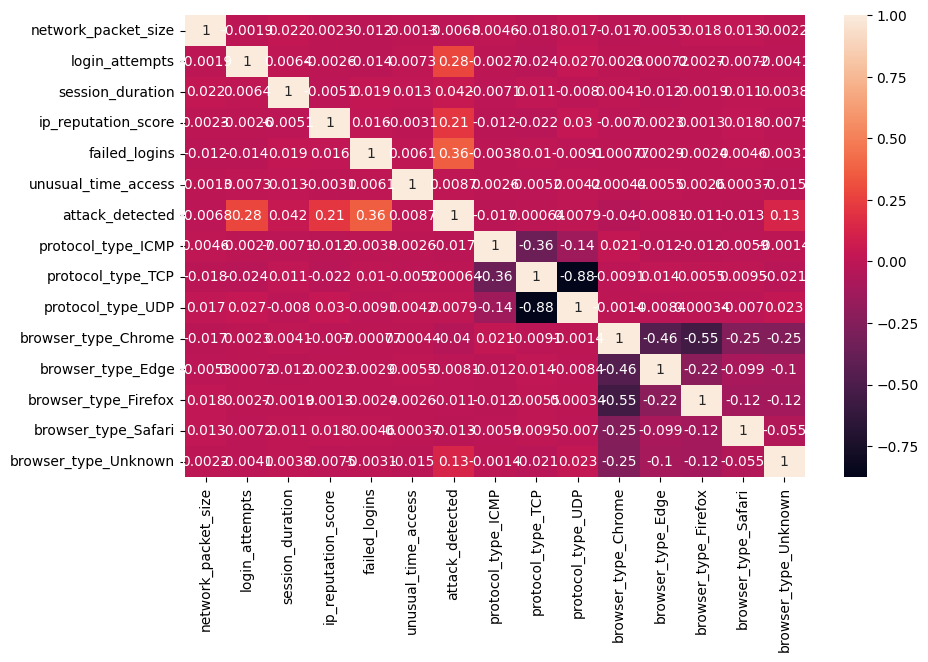

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True),annot=True,)
plt.show()

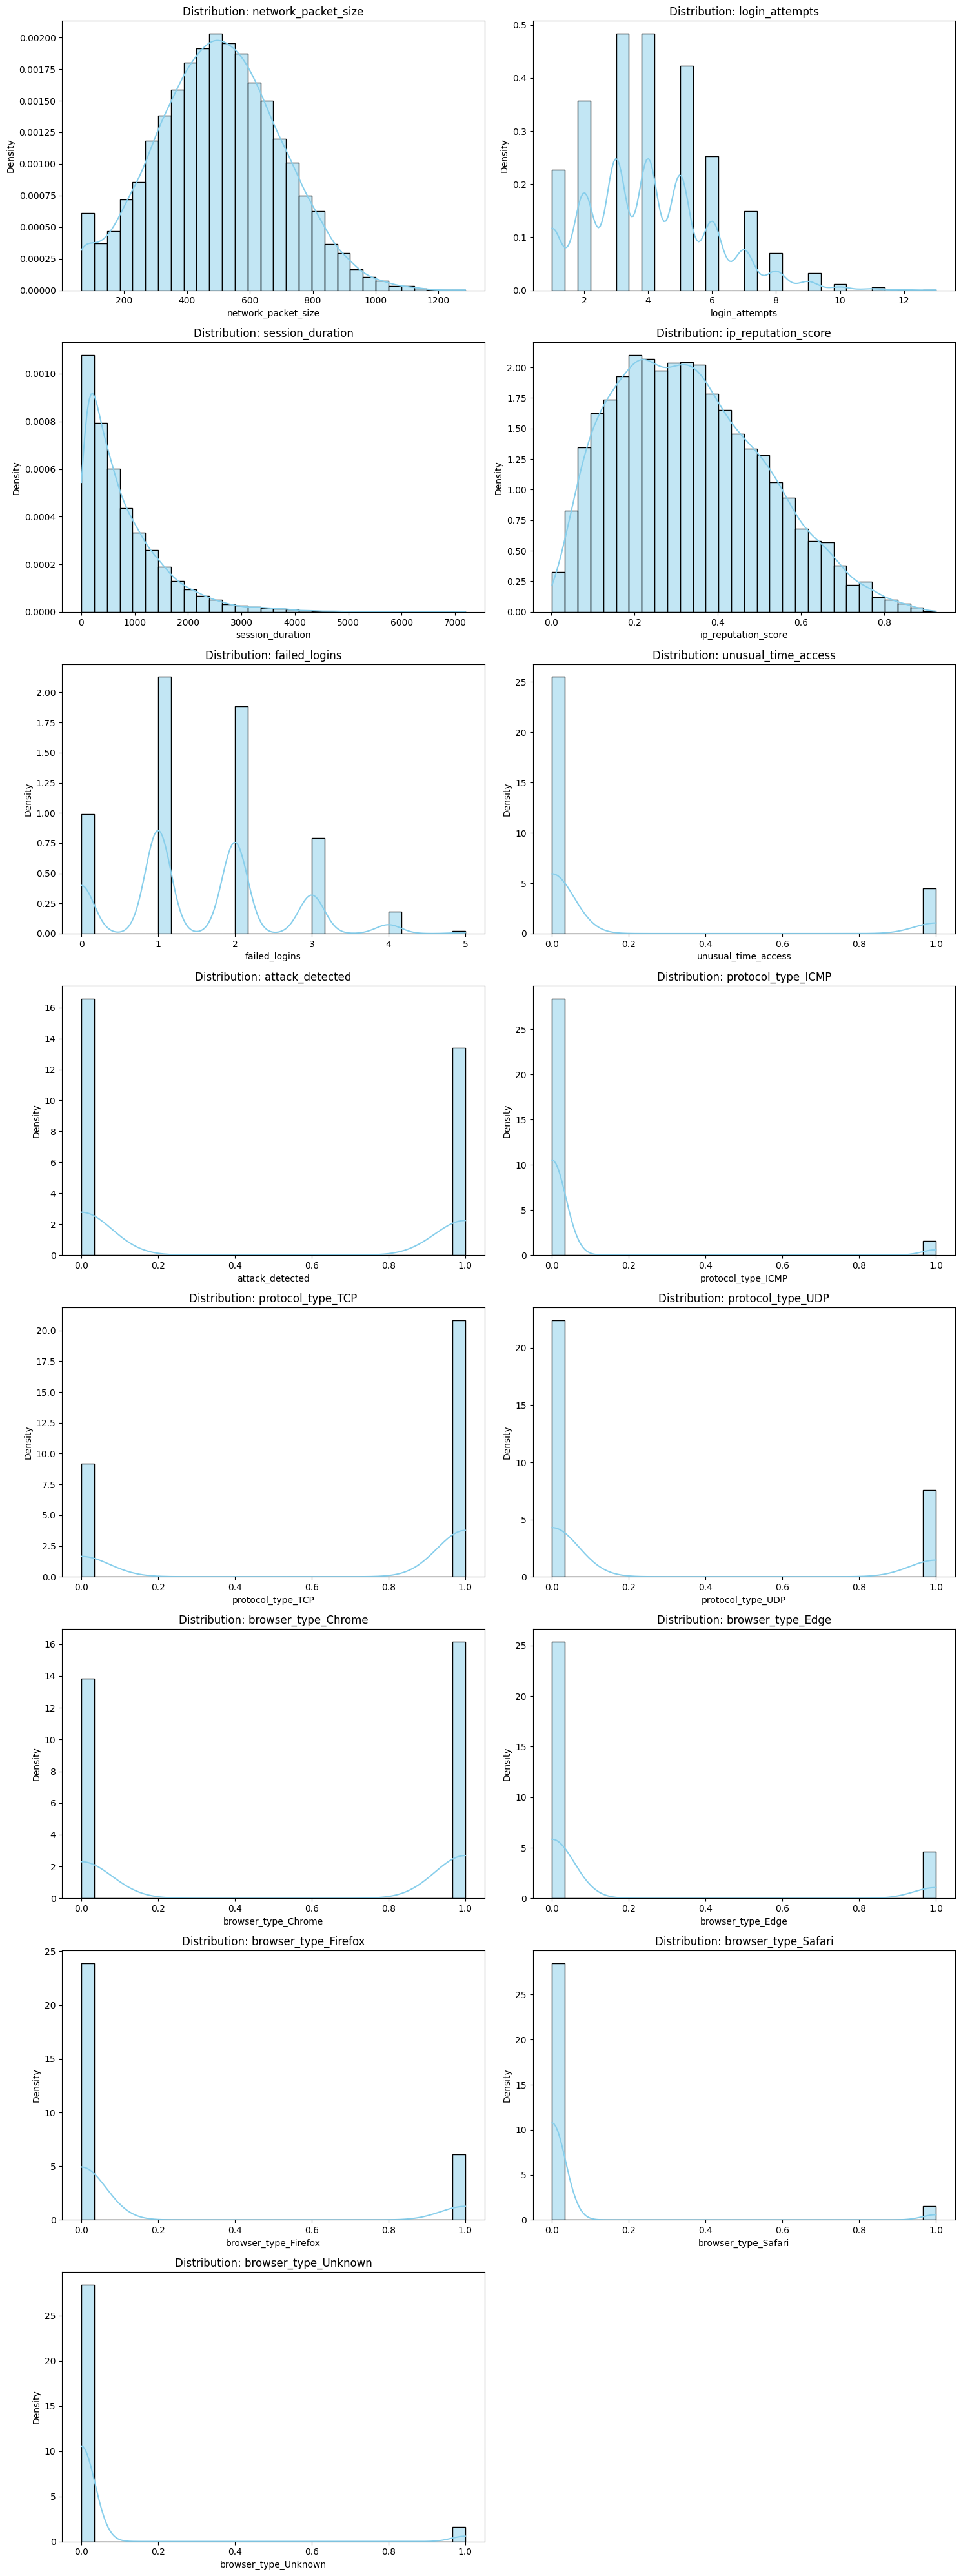

In [51]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(data[column], kde=True, stat='density', color='skyblue', bins=30)
    plt.title(f"Distribution: {column}")
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [52]:
models={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Logistic Regression":LogisticRegression(),
    "Naive Bayes Classifier":GaussianNB()
}

In [53]:
x=data.drop(["attack_detected"],axis=1)
y=data["attack_detected"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [54]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall':[]
}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(precision * 100)
    metrics['Recall'].append(recall * 100)
    print(f"Model: {name}")
    print(f"Accuracy: {acc*100}")
    print(f"Precision: {precision*100}")
    print(f"F1 Score: {f1*100}")
    print(f"Recall: {recall*100}")
    print("-" * 30)

Model: Random Forest Classifier
Accuracy: 89.22431865828092
Precision: 98.93867924528303
F1 Score: 86.71834625322997
Recall: 77.18491260349586
------------------------------
Model: Decision Tree Classifier
Accuracy: 80.96436058700209
Precision: 77.69028871391076
F1 Score: 79.64125560538116
Recall: 81.69273229070836
------------------------------
Model: Logistic Regression
Accuracy: 74.67505241090147
Precision: 75.50158394931363
F1 Score: 70.30481809242872
Recall: 65.77736890524379
------------------------------
Model: Naive Bayes Classifier
Accuracy: 82.26415094339623
Precision: 90.09661835748793
F1 Score: 77.911227154047
Recall: 68.62925482980681
------------------------------


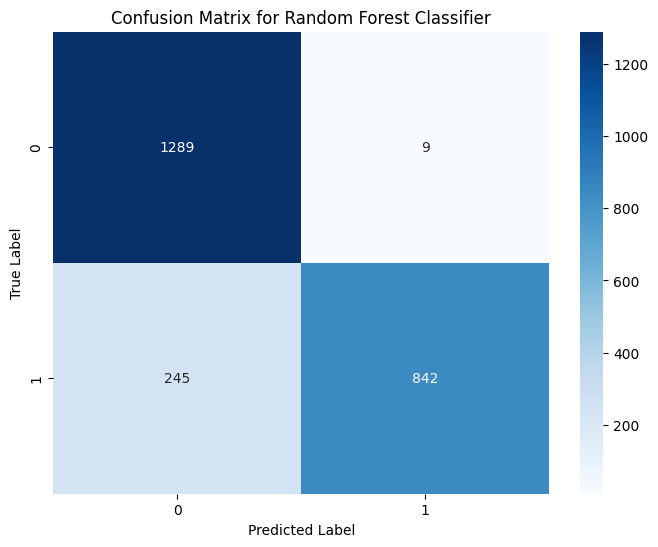

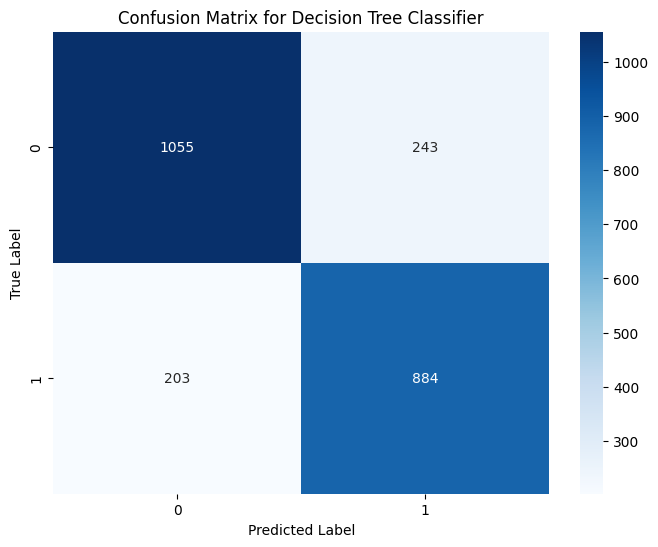

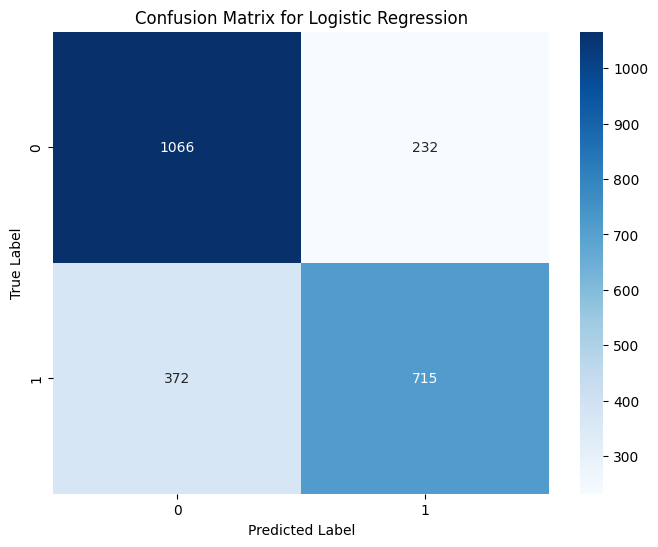

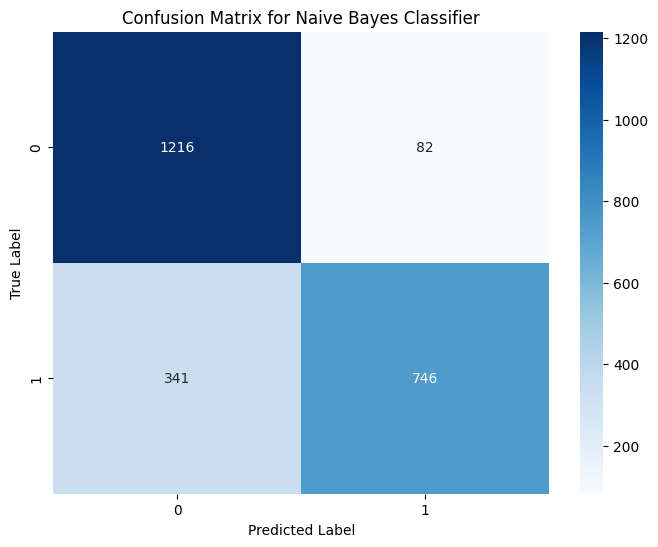

In [55]:
accuracy_results={}
for name,clf in models.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_results[name]=accuracy
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

<Figure size 1400x600 with 0 Axes>

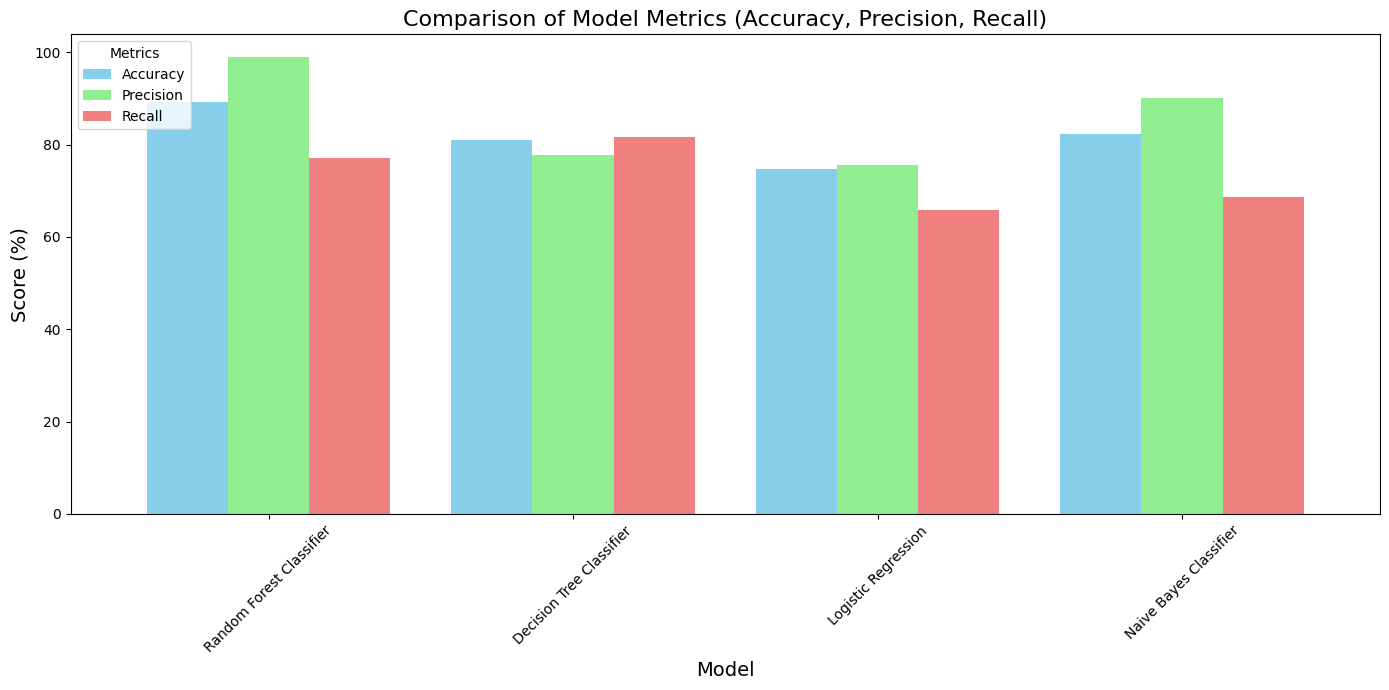

In [56]:
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(14, 6))
metrics_df.set_index('Model').plot(kind='bar', width=0.8, figsize=(14, 7), color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Comparison of Model Metrics (Accuracy, Precision, Recall)', fontsize=16)
plt.ylabel('Score (%)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='upper left')
plt.tight_layout()
plt.show()